# Haberman's Survival Data :Analysis

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's
Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

- Number of Instances: 306
- Number of Attributes: 4 (including the class attribute)

# Attribute Information:

- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute):-
      1 = the patient survived 5 years or longer 
      2 = the patient died within 5 year


# Objective
To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='dark', font='sans-serif', font_scale=1, color_codes=False, rc=None)
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
# load the dataset
cancer_df = pd.read_csv('haberman.csv', header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status'])
print(cancer_df.head(5))

   age  year_of_treatment  positive_lymph_nodes  survival_status
0   30                 64                     1                1
1   30                 62                     3                1
2   30                 65                     0                1
3   31                 59                     2                1
4   31                 65                     4                1


In [5]:
# getting the overview of the data
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                     306 non-null int64
year_of_treatment       306 non-null int64
positive_lymph_nodes    306 non-null int64
survival_status         306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [6]:
print(cancer_df.describe())

              age  year_of_treatment  positive_lymph_nodes  survival_status
count  306.000000         306.000000            306.000000       306.000000
mean    52.457516          62.852941              4.026144         1.264706
std     10.803452           3.249405              7.189654         0.441899
min     30.000000          58.000000              0.000000         1.000000
25%     44.000000          60.000000              0.000000         1.000000
50%     52.000000          63.000000              1.000000         1.000000
75%     60.750000          65.750000              4.000000         2.000000
max     83.000000          69.000000             52.000000         2.000000


In [7]:
print(cancer_df.count())

age                     306
year_of_treatment       306
positive_lymph_nodes    306
survival_status         306
dtype: int64


In [8]:
print(cancer_df.head())

   age  year_of_treatment  positive_lymph_nodes  survival_status
0   30                 64                     1                1
1   30                 62                     3                1
2   30                 65                     0                1
3   31                 59                     2                1
4   31                 65                     4                1


In [9]:
# modify the "survival_status"column values to be meaningful as well as categorical
cancer_df['survival_status'] = cancer_df['survival_status'].map({1:"survived", 2:"not_survived"})
cancer_df['survival_status'] = cancer_df['survival_status'].astype('category',copy=False)
print(cancer_df.head())


   age  year_of_treatment  positive_lymph_nodes survival_status
0   30                 64                     1        survived
1   30                 62                     3        survived
2   30                 65                     0        survived
3   31                 59                     2        survived
4   31                 65                     4        survived


In [154]:
print(cancer_df['survival_status'].value_counts())

survived        225
not_survived     81
Name: survival_status, dtype: int64


In [155]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                     306 non-null int64
year_of_treatment       306 non-null int64
positive_lymph_nodes    306 non-null int64
survival_status         306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


In [156]:
survival_info=cancer_df.loc[cancer_df['survival_status']=="survived"]
non_survival_info=cancer_df.loc[cancer_df['survival_status']=="not_survived"]

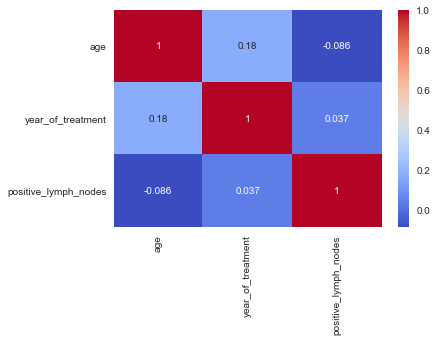

In [157]:
cd=survival_info.corr()
sns.heatmap(cd,cmap='coolwarm',annot=True)

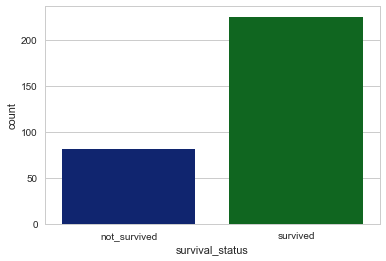

In [158]:
sns.countplot(x="survival_status", data=cancer_df)

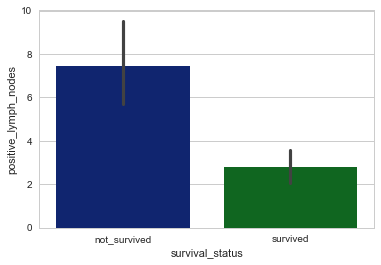

In [159]:
sns.barplot(x='survival_status',y='positive_lymph_nodes',data=cancer_df)


## Observation :
1. Much people survived for 5 years or more, after surgery.
2. Treatment appers to be effective
3. Patients having 2-3 positive lymph nodes mostly survived

# 1.Univariate Analysis :

In [10]:
# SPLITTING THE DATASET INTO TWO DATASETS(survival_info AND non_survival_info)
# survival_info: contains data of patients who survived
# non_survival_info: contains data of patients who could not survive

survival_info=cancer_df.loc[cancer_df['survival_status']=='survived']
non_survival_info=cancer_df.loc[cancer_df['survival_status']=='not_survived']


## 1.1. 1-D plots

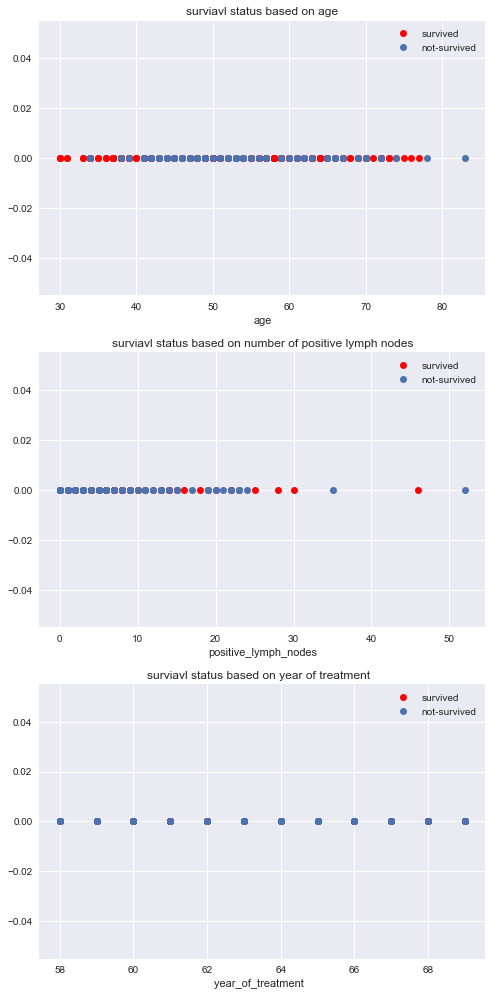

In [11]:
sns.set(style='darkgrid')
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(7,14))

axes[0].plot(survival_info["age"], np.zeros_like(survival_info['age']), 'ro',label='survived')
axes[0].plot(non_survival_info["age"], np.zeros_like(non_survival_info['age']), 'o',label='not-survived')
axes[0].set_xlabel("age")
axes[0].set_title('surviavl status based on age')
axes[0].legend()

axes[1].plot(survival_info["positive_lymph_nodes"], np.zeros_like(survival_info['positive_lymph_nodes']), 'ro',label='survived')
axes[1].plot(non_survival_info["positive_lymph_nodes"], np.zeros_like(non_survival_info['positive_lymph_nodes']), 'o',label='not-survived')
axes[1].set_xlabel("positive_lymph_nodes")
axes[1].set_title('surviavl status based on number of positive lymph nodes')
axes[1].legend()

axes[2].plot(survival_info["year_of_treatment"], np.zeros_like(survival_info['positive_lymph_nodes']), 'ro',label='survived')
axes[2].plot(non_survival_info["year_of_treatment"], np.zeros_like(non_survival_info['positive_lymph_nodes']), 'o',label='not-survived')
axes[2].set_xlabel("year_of_treatment  ")
axes[2].set_title('surviavl status based on year of treatment  ')
axes[2].legend()


plt.tight_layout()


## Observation: 
1. no insight drawn as too much overlapping present

## 1.2. 2-D plots

### 1.2.1. Histogram

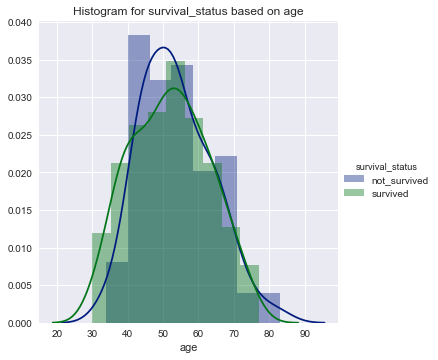

In [162]:
sns.FacetGrid(cancer_df, hue="survival_status" , size=5,palette='dark')\
    .map(sns.distplot, "age")\
    .add_legend()
plt.title('Histogram for survival_status based on age')
plt.show()

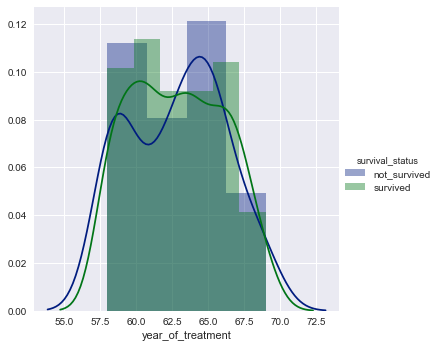

In [163]:
sns.FacetGrid(cancer_df, hue="survival_status", size=5,palette='dark')\
    .map(sns.distplot, "year_of_treatment")\
    .add_legend()
plt.show()

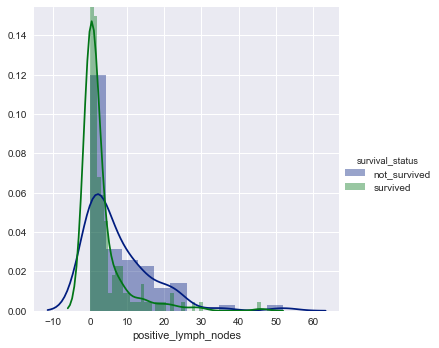

In [164]:
sns.FacetGrid(cancer_df, hue="survival_status", size=5,palette='dark')\
    .map(sns.distplot, "positive_lymph_nodes")\
    .add_legend()
plt.show()

## Observation:
1. Patients aged less than 40 are more likely to survive for more than 5 years.
2. Patient in range of 40-60 are more likely to die.
3. Patients who got operated in 1958-1963 or 1966-1968 are more likely to survive.
4. Patients who got operated in 1963-1966 might not have survived for more than 5 years.
5. Patients with less than 5 positive lymph nodes are more likely to survive for more than 5 years.
6. Patients with more than 5 positive lymph nodes might not survive.

### 1.2.2. PDF and CDF

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
--------------------------------------------------------------------------
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
--------------------------------------------------------------------------


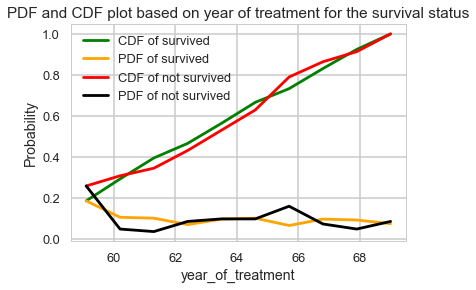

In [165]:
#plotting pdf and cdf of survived and non-survived patients(based on year of treatment) on same plot for clear vision.
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
counts, bin_edges = np.histogram(survival_info['year_of_treatment'], bins=10,density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);
print('--------------------------------------------------------------------------')
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,color='green')
plt.plot(bin_edges[1:],pdf,color='orange')



counts, bin_edges = np.histogram(non_survival_info['year_of_treatment'], bins=10,density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);
print('--------------------------------------------------------------------------')
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,color='red')
plt.plot(bin_edges[1:],pdf,color='black')

plt.xlabel('year_of_treatment')
plt.ylabel('Probability')
plt.title("PDF and CDF plot based on year of treatment for the survival status")

label =["CDF of survived", "PDF of survived","CDF of not survived", "PDF of not survived"]
plt.legend(label)

plt.show()

## Observation:
1. Patient who got operated in between 1960-1962 or 1967-1968 are more likely to survive.
2. Patients operated in year 1965-1967 might not have survived

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


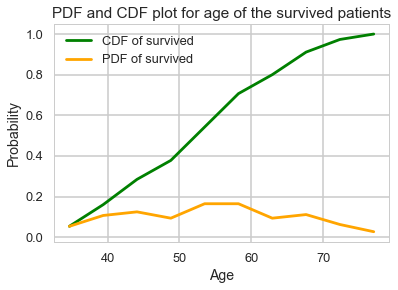

In [14]:
# plot of cdf and pdf of survived patients based on age
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
label =["CDF of survived", "PDF of survived"]
counts, bin_edges = np.histogram(survival_info['age'], bins=10,density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],cdf,color='green')
plt.plot(bin_edges[1:],pdf,color='orange')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title("PDF and CDF plot for age of the survived patients")
plt.legend(label)
plt.show()

## Observation:
1. Patients in age range of 50-60 has high chances of survival.
2. 60% of patients below age of 55 survived
3. Patients aged 67 or more might not have survived

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


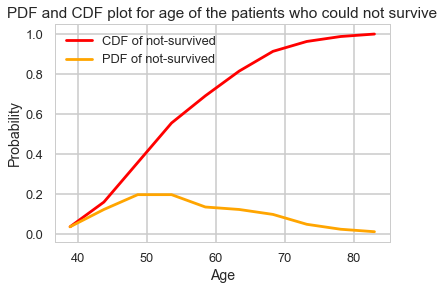

In [167]:
# plot of cdf and pdf of non survived patients based on age
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
label = ["CDF of not-survived", "PDF of not-survived"]
counts, bin_edges = np.histogram(non_survival_info['age'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],cdf,color='red')
plt.plot(bin_edges[1:],pdf,color='orange')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title("PDF and CDF plot for age of the patients who could not survive")
plt.legend(label)
plt.show()

# Observation:
1. 40% patients below 50 years of age could not survive
2. Patients aged between 46-55 are less likely to survive

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


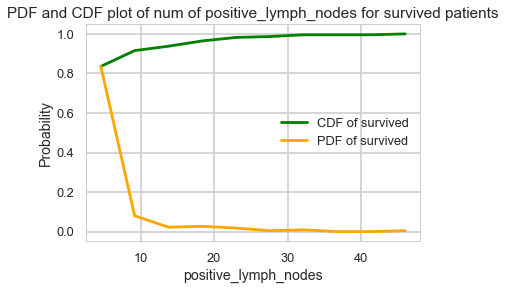

In [168]:
# plot of cdf and pdf of survived patients based on number of lymph nodes

sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
label =["CDF of survived", "PDF of survived"]
counts, bin_edges = np.histogram(survival_info['positive_lymph_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],cdf,color='green')
plt.plot(bin_edges[1:],pdf,color='orange')

plt.xlabel('positive_lymph_nodes')
plt.ylabel('Probability')
plt.title("PDF and CDF plot of num of positive_lymph_nodes for survived patients")
plt.legend(label)
plt.show()

## Observations:
1. approx 90% patients who survived had less than 10 postive lymph nodes.
2. From pdf it is clear as number of lymph nodes increases chance of survival is minimal.
3. Number of postive lymph node is important parameter to analyse survival status.
   

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


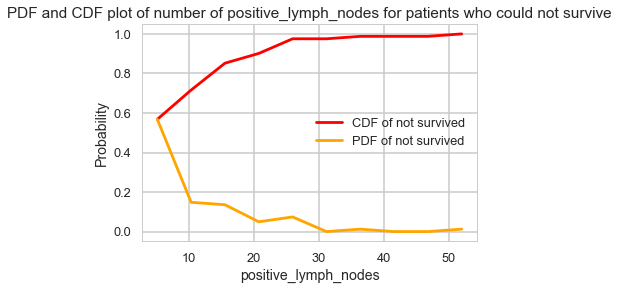

In [169]:
# plot of cdf and pdf of non-survived patients based on number of lymph nodes

sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
label =["CDF of not survived", "PDF of not survived"]
counts, bin_edges = np.histogram(non_survival_info['positive_lymph_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],cdf,color='red')
plt.plot(bin_edges[1:],pdf,color='orange')

plt.xlabel('positive_lymph_nodes')
plt.ylabel('Probability')
plt.title("PDF and CDF plot of number of positive_lymph_nodes for patients who could not survive")
plt.legend(label)
plt.show()

## Observations: 
1. Patients having 10-15 lynph nodes might not have survived

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
--------------------------------------------------------------------------
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
--------------------------------------------------------------------------


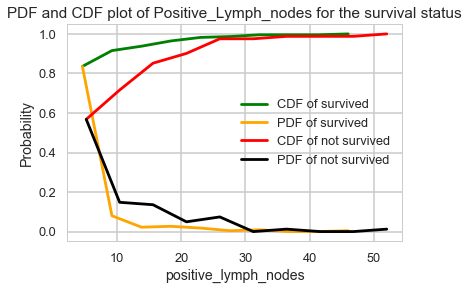

In [16]:
#plotting pdf and cdf of survived and non-survived patients(based on number of lymph nodes) on same plot for clear vision.
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
counts, bin_edges = np.histogram(survival_info['positive_lymph_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);
print('--------------------------------------------------------------------------')
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,color='green')
plt.plot(bin_edges[1:],pdf,color='orange')



counts, bin_edges = np.histogram(non_survival_info['positive_lymph_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);
print('--------------------------------------------------------------------------')
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,color='red')
plt.plot(bin_edges[1:],pdf,color='black')

plt.xlabel('positive_lymph_nodes')
plt.ylabel('Probability')
plt.title("PDF and CDF plot of Positive_Lymph_nodes for the survival status")

label =["CDF of survived", "PDF of survived","CDF of not survived", "PDF of not survived"]
plt.legend(label)

plt.show()

## Observation:

1. PDF of both classes first intersect at 8, if we take this point then with 40% of probablity we can say survival rates 
      are high for the patients having less than 8 positive_lymph_nodes.
2. Hence positive_lymph_nodes is the most import feature to predict the survival status after 5 years
3. The survival rates is extremely high for patients having less than 3 positive_lymph_nodes.


### 1.2.3 Mean, Variance and Std-dev

In [171]:
print("***** Mean, Variance and Std-dev for survival_info  based on number of lymph nodes *****")
print("Mean = {}".format(np.mean(survival_info['positive_lymph_nodes'])))
print("Variance = {}".format(np.var(survival_info['positive_lymph_nodes'])))
print("Std-dev = {}".format(np.std(survival_info['positive_lymph_nodes'])))
# std-dev(sigma) is sq root of variance
print("-----------------------------------------------------------------------------")
print("***** Mean, Variance and Std-dev for non_survival_info *****")
print("Mean = {}".format(np.mean(non_survival_info['positive_lymph_nodes'])))
print("Variance = {}".format(np.var(non_survival_info['positive_lymph_nodes'])))
print("Std-dev = {}".format(np.std(non_survival_info['positive_lymph_nodes'])))

***** Mean, Variance and Std-dev for survival_info  based on number of lymph nodes *****
Mean = 2.7911111111111113
Variance = 34.30747654320981
Std-dev = 5.857258449412131
-----------------------------------------------------------------------------
***** Mean, Variance and Std-dev for non_survival_info *****
Mean = 7.45679012345679
Variance = 83.3345526596555
Std-dev = 9.128776076761632


# 2.Bivariate Analysis :

## 2.1. Box-Plot

In [172]:
# DataFrames: 
#1.cancer_df : age,year_of_treatment,positive_lymph_nodes,survival_status 
#2.survival_info : age,year_of_treatment,positive_lymph_nodes,survival_status 
#3.non_survival_info : age,year_of_treatment,positive_lymph_nodes,survival_status 

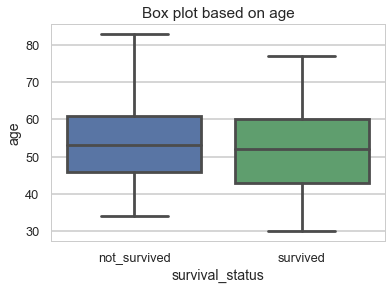

In [173]:
#Box plot
sns.boxplot(x='survival_status', y='age',data=cancer_df)
plt.title("Box plot based on age")
plt.show()

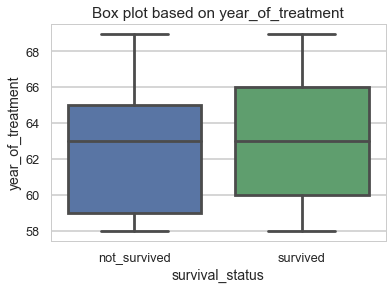

In [174]:
#Box plot
sns.boxplot(x='survival_status', y='year_of_treatment',data=cancer_df)
plt.title("Box plot based on year_of_treatment")
plt.show()

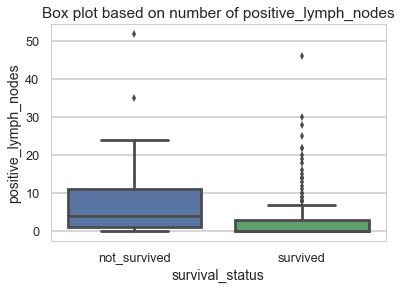

In [175]:
#Box plot
sns.boxplot(x='survival_status', y='positive_lymph_nodes',data=cancer_df)
plt.title("Box plot based on number of positive_lymph_nodes")
plt.show()

## Observation: 
1. more than 75 % of the survived patients had less than 5 lymph nodes
2. 25% of non survived patients had more than 10 lymph nodes
3. Box plot shows the presence of outliers

## 2.2. Violin plot

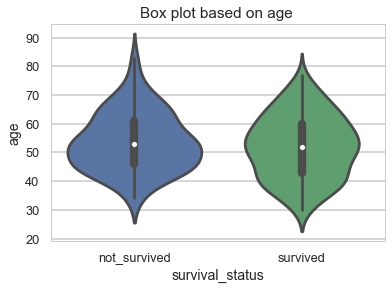

In [178]:
# violinplot
sns.violinplot(x='survival_status', y='age',data=cancer_df)
plt.title("Box plot based on age ")
plt.show()

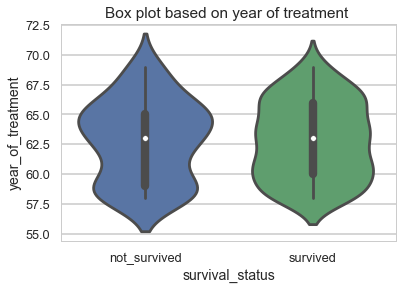

In [179]:
# violinplot
sns.violinplot(x='survival_status', y='year_of_treatment',data=cancer_df)
plt.title("Box plot based on year of treatment ")
plt.show()

## Observation: 
1. It is observed that more patients who were treated in the year 62.5-65 could not survive

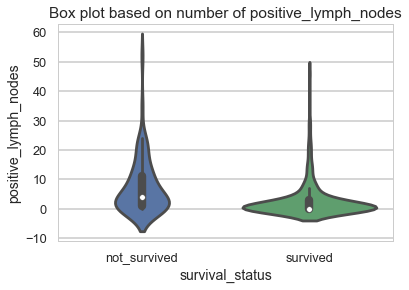

In [15]:
# violinplot
sns.violinplot(x='survival_status', y='positive_lymph_nodes',data=cancer_df)
plt.title("Box plot based on number of positive_lymph_nodes")
plt.show()

## Observation: 
1. patients with more than 10 lymph nodes are less likely to survive

## 2.3. Scatter plot

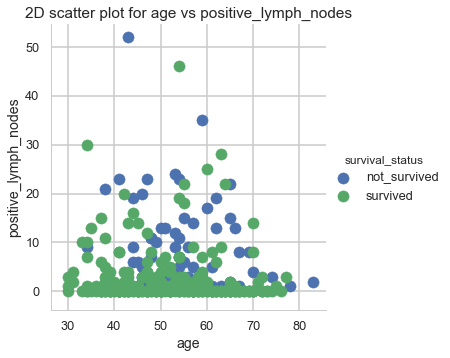

In [181]:
sns.set_style("whitegrid")
sns.FacetGrid(cancer_df, hue="survival_status",size=5).map(plt.scatter,"age","positive_lymph_nodes").add_legend()
plt.title('2D scatter plot for age vs positive_lymph_nodes')
plt.show()

## Observation: 
    1. It is observed that patients having less than 5 lymph nodes are more likely to survive irrespective of age group

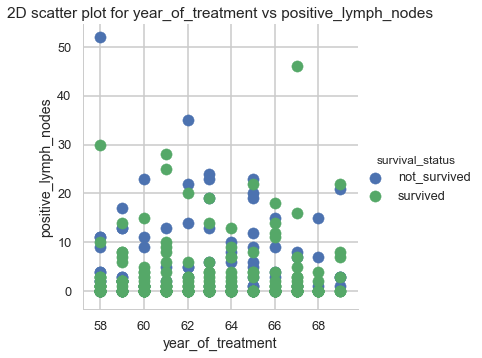

In [182]:
sns.set_style("whitegrid")
sns.FacetGrid(cancer_df, hue="survival_status",size=5).map(plt.scatter,"year_of_treatment","positive_lymph_nodes").add_legend()
plt.title('2D scatter plot for year_of_treatment vs positive_lymph_nodes')
plt.show()

## Observation: 
1. Too much overlapping,no substancial infornation found.

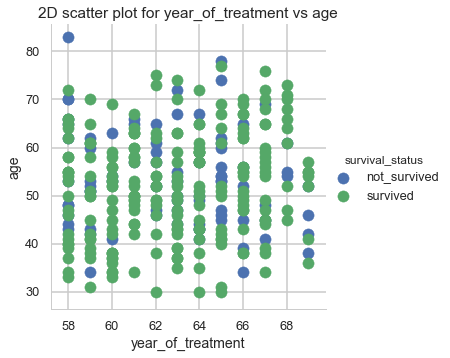

In [183]:
sns.set_style("whitegrid")
sns.FacetGrid(cancer_df, hue="survival_status",size=5).map(plt.scatter,"year_of_treatment","age").add_legend()
plt.title('2D scatter plot for year_of_treatment vs age')
plt.show()

## Observation: 
1. Too much overlapping,no substancial information found.

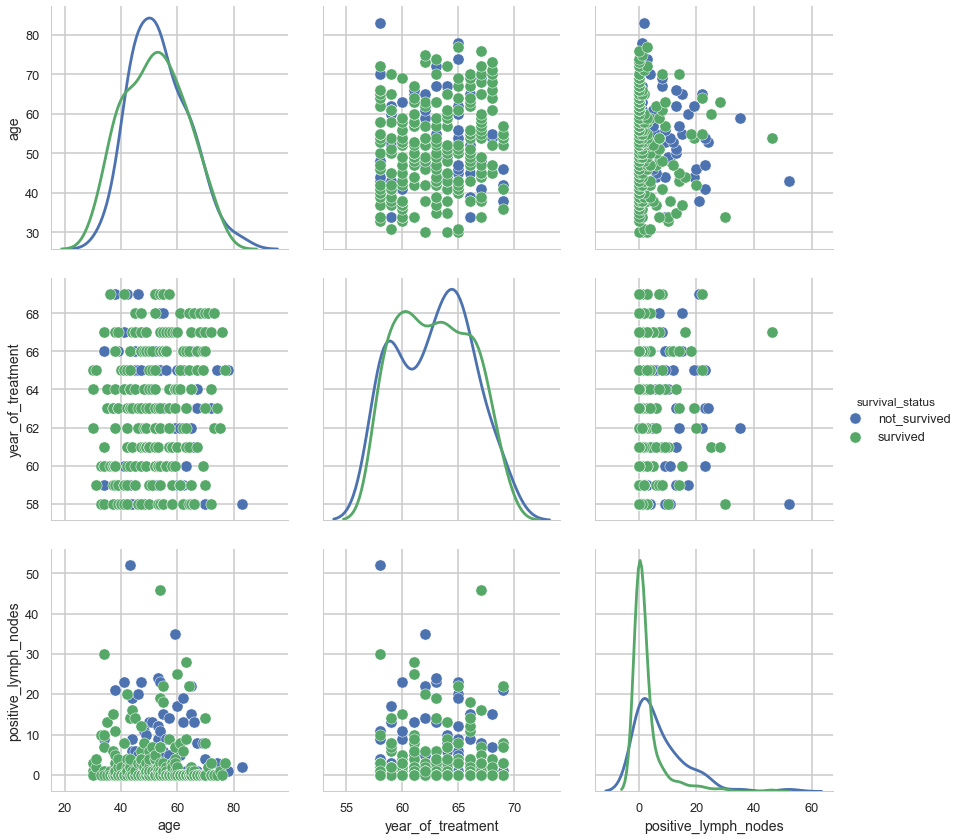

In [184]:
sns.set_context("poster",font_scale=0.8)
sns.pairplot(cancer_df, hue="survival_status",vars=['age','year_of_treatment','positive_lymph_nodes'],diag_kind='kde', size=4)
plt.show()

# Conclusion: 

1. Given the parameters,it is difficult to pridict if patients will survive after 5 years or not.Most of the data points overlap.


2. we need to collect and study more useful features to determine the survival status of the patients.


3. These two classes(survived and not-survived) are linearly inseperable.we need to use non-linear model to determine the          survival status of the patients.


4. Only few basic information is obtained from the given data set: 
       a--> Most patient who survived had less than 5 lymph nodes.
       b--> Patients with more number of lymph nodes are less likely to survive.
       c--> Most of the surgery in the year 1960-1962 and 1967-1968 were successful.
       d--> Patients below 40 years of age had more chance of survival.
       
5. Among all three feature,'positive_lymph_node' is most useful to determine survival status.


6. Usefulness of features: positive_lymph_node>year_of_treatment>age
